LOAD, WRANGLING AND VISUALISED DATA 
===
----
## Queensland Government Open data

**October 2015 initiative data including initiative name, investment objectives, status, timeframes and costs for the Department of Transport and Main Roads (TMR)[link](https://data.qld.gov.au/dataset/tmr-ict-dashboard/resource/faaa6d6c-1895-4090-821e-31ef5ed1678e)**


### 1. Import required Python Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

### 2. Load the dataset

In [15]:
df = pd.read_csv('Downloads/qgictdbtmruploadoct2015.csv')
#list of the columns name
print list(df.columns)
# number of columns
print len(list(df.columns))
# Number of rows
print len(df)
#View contents of first row
print df.head(1)

['Category', 'Category name', 'Priority', 'Initiative name', 'Investment objectives', 'Initiative stage', 'Actual start date', 'Original planned end date', 'Planned end date', 'Duration (months)', 'Date data current at', 'Percentage complete', 'Overall status', 'Time-frame', 'Cost', 'Quality', 'Original total estimated expenditure', 'Revised total estimated expenditure', 'Number of times rebaselined (Financials)', 'Number of times rebaselined (Timeline)', 'Actual cost to date', 'Explanation of variance']
22
6
  Category                                      Category name Priority  \
0       CC  Infrastructure Management\nand Delivery (Infra...     High   

                                     Initiative name  \
0  Access Management System (AMS) - formerly Heav...   

                               Investment objectives Initiative stage  \
0  Improve heavy vehicle and load movement safety...         Delivery   

  Actual start date Original planned end date Planned end date  \
0         

### 3. Manipulate the dataset
---
1. **Change some of the dataset variable' names**
2. **Drop variables with insignificant information**
3. **Reduce lengths of some of the dataset in the string variables**

#### _3a. Change some of the dataset variable' names_

In [18]:
#Create dictionary to map the columns'name to shorter version
dictName = {'Original total estimated expenditure': 'Original Cost',
           'Revised total estimated expenditure': 'Revised Cost',
           'Number of times rebaselined (Financials)': 'Rebasedlined (Finacials)',
           'Number of times rebaselined (Timeline)': 'Rebaselined (Timeline)'
           }
#Change the columns'name
df = df.rename(columns = dictName)
#print the columns
list(df.columns)

['Category',
 'Category name',
 'Priority',
 'Initiative name',
 'Investment objectives',
 'Initiative stage',
 'Actual start date',
 'Original planned end date',
 'Planned end date',
 'Duration (months)',
 'Date data current at',
 'Percentage complete',
 'Overall status',
 'Time-frame',
 'Cost',
 'Quality',
 'Original Cost',
 'Revised Cost',
 'Rebasedlined (Finacials)',
 'Rebaselined (Timeline)',
 'Actual cost to date',
 'Explanation of variance']

#### _3b. Drop Variables with insignificant Information_
for example: Overall status,  Time-frame, Cost and  Quality 

In [22]:
# define function to perform the operation
def dropVariables(df, listofvariables):
    '''delete some of the columns from dataframe'''
    for col in listofvariables:
        df.drop(col, axis=1, inplace=True)
    return df
#run
df = dropVariables(df, ['Overall status', 'Time-frame', 'Cost', 'Quality'])
list(df.columns)

['Category',
 'Category name',
 'Priority',
 'Initiative name',
 'Investment objectives',
 'Initiative stage',
 'Actual start date',
 'Original planned end date',
 'Planned end date',
 'Duration (months)',
 'Date data current at',
 'Percentage complete',
 'Original Cost',
 'Revised Cost',
 'Rebasedlined (Finacials)',
 'Rebaselined (Timeline)',
 'Actual cost to date',
 'Explanation of variance']

#### _3c. Reduce lengths of some of the dataset in the string variables_
for example columns such as Category name, Initiative name, Investment objectivcs

In [25]:
#define function to clean data of tab, newline and so on
def regex(Str):
    '''regex('Infrastructure Management\nand Delivery (Infrastructure 
    Management and Delivery Division)') => Infrastructure Management
    '''
    regex = re.findall(r'\w+', Str)
    return ' '.join(regex[:2])

#define finction to apply regex to the dataframe
def reduceTheLengthyWords(df, listofvariables):
    for col in listofvariables:
        df[col] = df[col].map(lambda x: regex(x))
    return df
    
df = reduceTheLengthyWords(df, ['Category name', 'Initiative name','Investment objectives'])

#### _3d. Convert date columns within the dataframe to datetime_

In [30]:
def converttodate(df, listofcolumn):
    for col in listofcolumn:
        df[col] = df[col].map(lambda x:pd.to_datetime(x))
    return df
df = converttodate(df, ['Actual start date','Original planned end date', 'Planned end date'])

### 4. Visualize the Category variable with Orginal Cost, Revised Cost and Actual Cost

In [57]:
df = df.sort_values(by=['Original Cost', 'Revised Cost', 'Actual cost to date'], ascending=True)

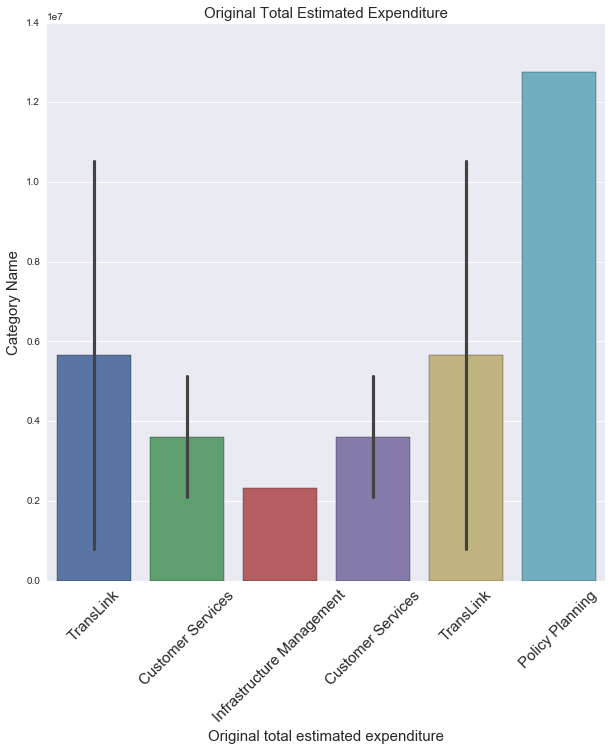

/Users/adebayo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


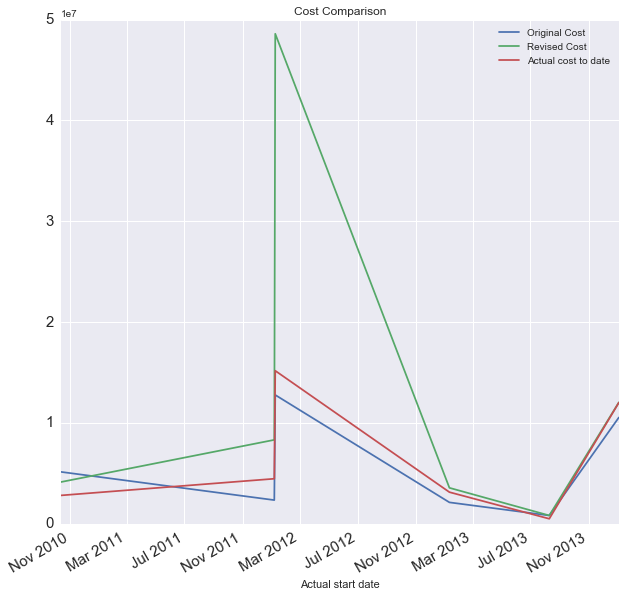

In [119]:
#set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (10, 10)})

#Plot 1 -  'Original Cost'
sns.barplot(x=df['Category name'], y=df['Original Cost'], 
              order=df["Category name"].tolist())
plt.xlabel('Original total estimated expenditure', fontsize=15)
plt.title('Original Total Estimated Expenditure', fontsize=15)
plt.ylabel('Category Name',fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.show()

#plot 2
df2 = df[['Actual start date', 'Original Cost', 'Revised Cost', 'Actual cost to date']]
df2.index = df2['Actual start date']
df2.drop('Actual start date', axis=1, inplace=True)
df2 =df2.sort_index()
df2.plot(title='Cost Comparison', fontsize=15)